# Introduction

This is my attempt at [Google Data Analytics Capstone - Case Study 1](https://www.coursera.org/learn/google-data-analytics-capstone/supplement/7PGIT/case-study-1-how-does-a-bike-share-navigate-speedy-success).

The Case Study is a hands-on practice of the general framework for conducting Data Analysis as stated by Google.

1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act

These six milestones will be the 6 main sections of this notebook. In each of the sections, there will be checklists that should all be checked off; these are questions that guide the flow of this case study.

* **Guiding Questions:** to be answered.
* **Key tasks:** to be done.
* **Deliverables:** to sum up the section.

# Ask

We start with familiarizing ourshelves with general background information of the company and the project.

   Cyclistic lauched its successful bike-share offering in 2016; and has since then
    grown to 5,824 bycicles that are geotracked and 692 stations accross Chicago.

   Cyclistic relied on building general awareness and appealing to broad consumer segments.

   It offers flexibility of pricing plans: single-ride passes and full-day passes for casual riders; and annual memberships for    Cyclistics members. Cyclistic's Executives believe that **maximizing the number of annual members will be key to future growth**. They believe there is a very good chance of converting casual riders into members, instead of appealing to general-target users in the next marketing campaign.
   
* We are tasked with answering the question: **How do annual members and casual riders use Cyclistic bikes differently?**


### Guiding questions:

* **What is the problem you are trying to solve?:** 
The main purpose is to identify trends among the two groups (casual riders and annual members); then explain how and why current casual riders may decide to turn into annual member. 

* **How can your insights drive business decisions?:**
And use this information to help build a marketing strategies to convert casual riders to annual members. This information is used by the marketing team to build the marketing plan. And the plan should be approved by the Cyclistic executive team.

### Key tasks

* **Identify the business task:**
Done

* **Consider key stakeholders:** 
Done

### Deliverable
* **A clear statement of the business task:** 
The task is to identify the key differences between casual riders and annual members; and determine how the marketing team can use digital media to influence current casual riders to become members.

# Prepare

The dataset that we are using was published for public use by [Divvy Bikes](https://divvybikes.com/) under the [Divvy Data Liencese aggrement](https://ride.divvybikes.com/data-license-agreement)

We have data of bike rents up to the latest date (2023 July). In order to keep the case study current and not overcomplicated, I am using the data of the last 1.5 years (from 2022 January through 2023 June).

### Guiding questions:

* **Where is your data located?:**
My Datasets are located on Kaggle cloud. They can be found [here](https://www.kaggle.com/datasets/tantriho/cyclistic-case-study-1-2022-jan-2023-june?select=202205-divvy-tripdata.csv).

* **How is the data organized?:**
The data are stored in several files. Each file for each month from 2022 January through 2023 June, containing information regarding bike-trips. These data are to be appended together.


* **Are there issues with bias or credibility in this data?:**
The data was directly collected by the company and it is the full data of the whole population of company's customers. Therefore, no problem of bias or credibility.
The data is ROCCC, reliable, original, comprehensive, current, and cited. 

* **How are you addressing licensing, privacy, security, and accessibility?:**
The company has already provided a license for use of the dataset. As of privacy concerns, the data doesn't contain any personnel-identifiable information.

* **How did you verify the data's integrity?:**
All of the data tables came in the same number and order of columns. All variables came in the right type or the right format to be converted to the right type. the stations' name and ID matched exclusively.

* **How does it help you answer your question?:**
At the first glance, this dataset may provides key insights regarding distance, time travelled, and when in a year that can differentiate between casual riders and annual members.

* **Are there any problems with the data?:**
There were roughly 15% of observations with missing start or end station, but they all had start/end coordinate with them. I turned to use the lattitude and longitude variables in place of discriminating different bike stations. But there are variance in the recorded lattitude and longitude of the same stations too. The provided list of stations is not the latest, and thus cannot be used to compliment this station variable.

### Key tasks:

* **Download data and store it appropriately:** Done

* **Identify how it's organized:** Done

* **sort and filter the data:** Done

* **Determine the credibility of the data:** Done

### Deliverable:

* **A description of all data sources used:** 
The dataset contains data collected in the latest 18 months (2022 January - 2023 June) about each trip made with Cilystic's service.

# Process

The data should be processed before it can be used in data analysis, ensuring that it is compartible with the analyzing methods and further manipulation (if needed) will be at ease.

In [1]:
# Loading package(s).
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Loading Data.
# Getting a list of files in the input folder
file_names <- list.files("../input/cyclistic-case-study-1-2022-jan-2023-june")[1:length(list.files("../input/cyclistic-case-study-1-2022-jan-2023-june")) - 1]
# Transform the list to contain the correct file paths
file_names <- lapply(file_names, function(x) paste("../input/cyclistic-case-study-1-2022-jan-2023-june/", x, sep = ""))

# Row-bind/Append all data in Input together
emerged_data <- do.call(rbind, lapply(file_names, read.csv))

head(emerged_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member


In [3]:
# member_casual has only two categories (as intended)
table(emerged_data$member_casual)


 casual  member 
3149953 4908223 

In [4]:
# Checking for duplicates
sum(duplicated(x = emerged_data))

[1] 0

The result is zero, which means no duplicate was found.

**Type converting**

Initially, all variables were imported as either character or numeric data type, we have to convert them to their intended data type.

In [5]:
# Converting started_at and ended_at to datetime type
emerged_data$started_at <- as.POSIXct(x = emerged_data$started_at, "%Y-%m-%d %H:%M:%S")
emerged_data$ended_at <- as.POSIXct(x = emerged_data$ended_at, "%Y-%m-%d %H:%M:%S")

In [6]:
# Trimming extra white spaces in ride_id, start_station_name, start_station_id, end_station_name, end_station_id, rideable_type, and member_casual.
emerged_data$ride_id <- str_squish(emerged_data$ride_id)
emerged_data$member_casual <- str_squish(emerged_data$member_casual)
emerged_data$rideable_type <- str_squish(emerged_data$rideable_type)
emerged_data$start_station_id <- str_squish(emerged_data$start_station_id)
emerged_data$start_station_name <- str_squish(emerged_data$start_station_name)
emerged_data$end_station_id <- str_squish(emerged_data$end_station_id)
emerged_data$end_station_name <- str_squish(emerged_data$end_station_name)

# Normalize the categorical data (excluding ride_id and station_ids)
emerged_data$member_casual <- str_to_title(emerged_data$member_casual)
emerged_data$rideable_type <- str_to_title(emerged_data$rideable_type)
emerged_data$start_station_name <- str_to_title(emerged_data$start_station_name)
emerged_data$end_station_name <- str_to_title(emerged_data$end_station_name)

In [7]:
# Verifying exclusive matching of station names and IDs
tibble("Station_name" = c(emerged_data$start_station_name, emerged_data$end_station_name), 
       "ID" = c(emerged_data$start_station_id, emerged_data$end_station_id)) %>%
    group_by(Station_name) %>%
    summarise(distinct_count = n_distinct(ID)) %>%
    filter(distinct_count != 1) %>%
    head()
# There are a total of 24 stations with at least 2 distinct IDs for each - alerting potential data errors.

Station_name,distinct_count
<chr>,<int>
Bissell St & Armitage Ave - Charging,2
Bradley Park,2
California Ave & Cortez St,2
Calumet Ave & 51st St,2
Calumet Ave & 71st St,2
Central Park Ave & Ogden Ave,2


A little flip-flop of the code also showed 409 IDs of more than 1 corresponding Station_name. However, this doesn't signify incorrect data. But rather
a problem with standardizing the name of stations.

In [8]:
tibble("Station_name" = c(emerged_data$start_station_name, emerged_data$end_station_name), 
       "ID" = c(emerged_data$start_station_id, emerged_data$end_station_id)) %>%
    filter(ID == "DIVVY 001 - Warehouse test station") %>%
    head(2)

Station_name,ID
<chr>,<chr>
West Chi-Watson,DIVVY 001 - Warehouse test station
Westchi,DIVVY 001 - Warehouse test station


Considering that the lattitude-longitude variables have far less *Null* value; And they are the more universal geospatial charactereistics -that they can be mapped to a real-world map. I decided to use *start_lat, start-lng, end_lat,* and *end_lng* as the geo-spatial variable of the dataset.

In [9]:
emerged_data %>%
    select(start_station_id, end_station_id) %>%
    summarise(start_station_na = sum(start_station_id == ""),
             end_station_na = sum(end_station_id == ""))

start_station_na,end_station_na
<int>,<int>
1190613,1273846


In [10]:
tibble("lat" = c(emerged_data$start_lat, emerged_data$end_lat),
      "lng" = c(emerged_data$start_lng, emerged_data$end_lng)) %>%
summary()

      lat             lng        
 Min.   : 0.00   Min.   :-88.16  
 1st Qu.:41.88   1st Qu.:-87.66  
 Median :41.90   Median :-87.64  
 Mean   :41.90   Mean   :-87.65  
 3rd Qu.:41.93   3rd Qu.:-87.63  
 Max.   :45.63   Max.   :  0.00  
 NA's   :8318    NA's   :8318    

In [11]:
# The zeros in latitudes and longitudes are errors, in addition to NA in latitudes and longitudes, 
# they account for less than 10% of the total observations, so I removed them
emerged_data %>%
    filter(end_lat == 0 | end_lng == 0 | start_lat == 0 | start_lng == 0)


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3B47B333C0D186F0,Classic_bike,2022-11-09 13:39:03,2022-11-09 13:44:38,Franklin St & Adams St (Temp),TA1309000008,Green St & Madison Ave*,chargingstx07,41.87943,-87.63550,0,0,Member
42AF82C53D831251,Electric_bike,2022-11-09 16:17:40,2022-11-09 16:38:06,Laflin St & Cullerton St,13307,Green St & Madison Ave*,chargingstx07,41.85492,-87.66369,0,0,Casual
BB8AA29838266294,Classic_bike,2022-11-09 11:32:53,2022-11-09 11:37:30,Canal St & Adams St,13011,Green St & Madison Ave*,chargingstx07,41.87926,-87.63990,0,0,Member
6AFE1471227BD76F,Classic_bike,2022-11-09 16:17:16,2022-11-09 16:26:17,Morgan St & Polk St,TA1307000130,Green St & Madison Ave*,chargingstx07,41.87174,-87.65103,0,0,Casual
E9495F1DC3475D41,Classic_bike,2022-11-09 12:21:55,2022-11-09 12:26:18,Aberdeen St & Randolph St,18062,Green St & Madison Ave*,chargingstx07,41.88411,-87.65426,0,0,Member
75DE33501313D0CE,Classic_bike,2022-11-09 15:52:08,2022-11-09 15:52:23,Green St & Madison St,TA1307000120,Green St & Madison Ave*,chargingstx07,41.88189,-87.64879,0,0,Member
0A6988FE859F4D54,Classic_bike,2022-11-09 10:58:37,2022-11-09 11:06:21,Lasalle St & Jackson Blvd,TA1309000004,Green St & Madison Ave*,chargingstx07,41.87817,-87.63193,0,0,Member
7F49424E860E7094,Classic_bike,2022-11-09 13:27:04,2022-11-09 13:28:28,Green St & Washington Blvd,13053,Green St & Madison Ave*,chargingstx07,41.88318,-87.64872,0,0,Member
873D50153BBC0686,Electric_bike,2023-06-15 12:38:05,2023-06-15 12:38:41,Oh Charging Stx - Test,OH Charging Stx - Test,Oh Charging Stx - Test,OH Charging Stx - Test,41.86317,-87.67981,0,0,Member


In [12]:
emerged_data <- emerged_data %>%
    filter(!is.na(end_lat), !is.na(end_lng), !is.na(start_lat), !is.na(start_lng),
          end_lat != 0, end_lng != 0, start_lat != 0, start_lng != 0)

In [13]:
# We can see that the latitude and longitude figures may differ within the same station
# This is an error in our data, while we don't have access a more consistent data for latitude and longitue
# Plotting these into a real-world map with aggregating on districts, counties, etc. can help with these small variance.
# For example:
emerged_data %>%
    filter(start_station_name == "Damen Ave & Cortland St" ) %>%
    head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ED582A16A84658F3,Electric_bike,2022-01-04 07:21:28,2022-01-04 07:34:36,Damen Ave & Cortland St,13133,Damen Ave & Wabansia Ave,20.0,41.91595,-87.67738,41.91000,-87.68000,Casual
2,96EE9C6CBAB01FF5,Classic_bike,2022-01-03 11:40:18,2022-01-03 11:46:41,Damen Ave & Cortland St,13133,Paulina Ave & North Ave,TA1305000037,41.91598,-87.67733,41.90985,-87.66993,Member
3,1FDEAD0572CA2280,Classic_bike,2022-01-16 00:12:47,2022-01-16 00:51:09,Damen Ave & Cortland St,13133,Clark St & Drummond Pl,TA1307000142,41.91598,-87.67733,41.93125,-87.64434,Member
4,C0307E7C114DD71A,Electric_bike,2022-01-15 17:09:53,2022-01-15 17:17:29,Damen Ave & Cortland St,13133,Bissell St & Armitage Ave,13059,41.91599,-87.67735,41.91802,-87.65218,Member
5,58B7345137308C4F,Electric_bike,2022-01-13 22:26:47,2022-01-13 22:28:59,Damen Ave & Cortland St,13133,Milwaukee Ave & Wabansia Ave,13243,41.91597,-87.67722,41.91262,-87.68139,Casual
6,E2038354C0956114,Electric_bike,2022-01-14 10:50:23,2022-01-14 10:58:19,Damen Ave & Cortland St,13133,Leavitt St & Division St,658,41.91597,-87.67737,41.90300,-87.68382,Casual


# Data Manipulating

This helps adding new computed variables that may be helpful for analyzing

**ride_time_minutes**

Represent the total time of each ride, in minutes

In [14]:
emerged_data <- emerged_data %>%
    mutate(ride_time_minutes = as.numeric((ended_at - started_at) / 60)) %>%
    filter(ride_time_minutes > 0) #removing rides with negative or zero length (data consistency)

**seperate column for month - year**

It helps easier aggregating and plotting based on grouping by month - year.

In [15]:
emerged_data <- emerged_data %>%
    mutate(start_year_month = paste(
        strftime(started_at, "%Y"),
        "-",
        strftime(started_at, "%m")
    ))

**start_weekday**

This is helpful with examining trends in a week

In [16]:
emerged_data <- emerged_data %>%
    mutate(start_weekday = strftime(started_at, "%a"))
           
emerged_data$start_weekday <- factor(emerged_data$start_weekday, levels = c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))

**start_hour**

This is helpful with examining trends within a day

In [17]:
emerged_data <- emerged_data %>%
    mutate(start_hour = strftime(started_at, "%H"))
sort(unique(emerged_data$start_hour))

[1] "00" "01" "02" "03" "04" "05" "06" "07" "08" "09" "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19" "20" "21" "22" "23"

### Guiding questions:

* **What tools are you choosing and why?:**
I am using R written on notebook platform provided by Kaggle for this data analysis project because of its practicality and its ability to create customized operations/functions. And it can work as a gallery for my portfolio.

* **Have you ensured your data's integrity?:**
The row-combinding operation didn't return any error or unexpected results - confirming the consistency of the data table columns accross different csv input files.
The variables were in the right data type.
However,here are some inconsistence in Station name, station's coordination. These call for better data gathering.

* **What steps have you taken to ensure that your data is clean?:**
I have removed all the duplicates observations in the data, as well as proper formatting and class-converting of all variables.

* **How can you verify that your data is clean and ready to analyze?:**
Operations to clean the dta was conducted, and rerunning the same tests that were used to detect the uncleans confirmed that the data was cleaned.

* **Have you documented your cleaning process so you can review and share those results?:**
All the steps, codes, and comments of the project are documented in this R Notebook

### Key tasks:

* **Check the data for errors:** Done

* **Choose your tools:** Done

* **Transform the data so you can work with it effectively:** Done

* **Document the cleaning process:** Done

### Deliverable:

* **Documentaion of any cleaning or manipulation of data:**


# Analyze
The data is stored appropriately and is in the good shape for analysis.

# Code


In [18]:
# This function help to resize the plots
fig <- function(width, heigth){options(repr.plot.width = width, repr.plot.height = heigth)}

In [19]:
cyclistics <- emerged_data
head(cyclistics, 4)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time_minutes,start_year_month,start_weekday,start_hour
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<fct>,<chr>
1,C2F7DD78E82EC875,Electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,Casual,2.95000,2022 - 01,Thu,11
2,A6CF8980A652D272,Electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,Casual,4.35000,2022 - 01,Mon,08
3,BD0F91DFF741C66D,Classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,Member,4.35000,2022 - 01,Tue,04
4,CBB80ED419105406,Classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,Casual,14.93333,2022 - 01,Tue,00


**Summary of all the variables**

In [20]:
summary(cyclistics)

   ride_id          rideable_type        started_at                 
 Length:8049101     Length:8049101     Min.   :2022-01-01 00:00:05  
 Class :character   Class :character   1st Qu.:2022-06-21 08:26:20  
 Mode  :character   Mode  :character   Median :2022-09-06 18:32:29  
                                       Mean   :2022-10-11 15:10:54  
                                       3rd Qu.:2023-02-28 15:15:00  
                                       Max.   :2023-06-30 23:59:56  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2022-01-01 00:01:48   Length:8049101     Length:8049101    
 1st Qu.:2022-06-21 08:39:43   Class :character   Class :character  
 Median :2022-09-06 18:47:58   Mode  :character   Mode  :character  
 Mean   :2022-10-11 15:26:45                                        
 3rd Qu.:2023-02-28 15:24:20                                        
 Max.   :2023-07-01 18:26:01      

The ride_time_minutes variable have maximum of 34354.07, which is almost a month, we will delve into this to see if it was an error.

**Data distribution**

We examine the distribution of our variables, we are looking for overview of the big picture.

In [21]:
# Casuals vs. Members
cyclistics %>%
    group_by(member_casual) %>%
    summarise(Count = n(),
             Percentage = n() / nrow(cyclistics) * 100)

member_casual,Count,Percentage
<chr>,<int>,<dbl>
Casual,3142310,39.03927
Member,4906791,60.96073


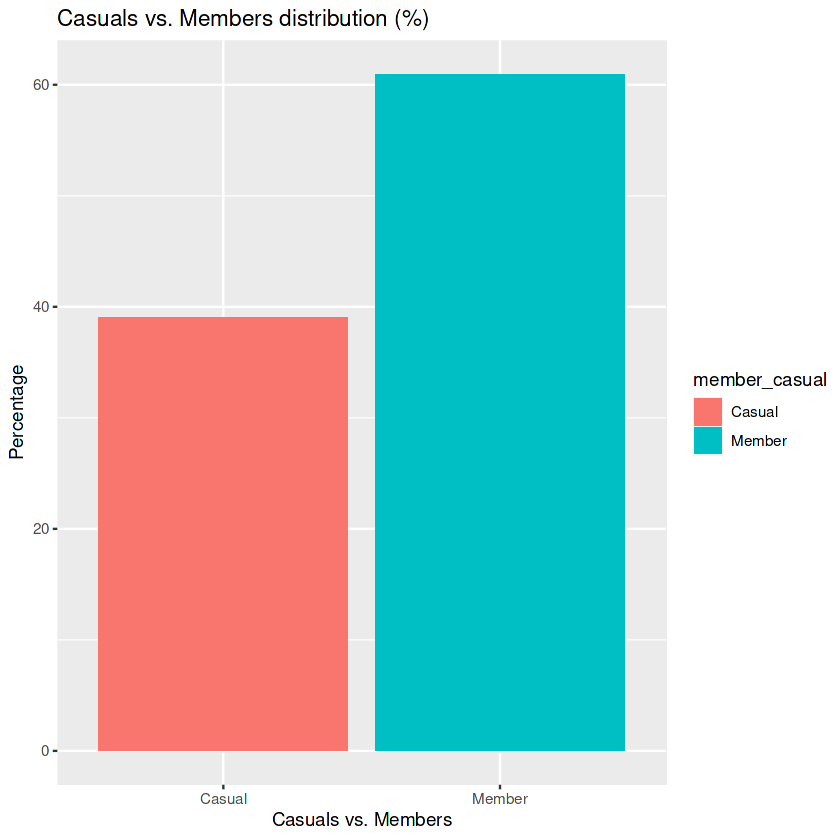

In [22]:
cyclistics %>%
    group_by(member_casual) %>%
    summarise(Percentage = n() / nrow(cyclistics) * 100) %>%
ggplot() +
    geom_col(mapping = aes(x = member_casual, y = Percentage, fill=member_casual)) +
    labs(x="Casuals vs. Members", title="Casuals vs. Members distribution (%)") 

As stated by the Marketing team, key to our growth lies in converting the Casual riders into Member riders.

As seen from the graph, approximately 2/5 of our rides were by casual customers. There is plenty of potential growth we can make converting these customers into our Members.

# Examine trends over Month

Identify if there was a trend of riding month-by-month.

In [23]:
cyclistics %>%
    group_by(start_year_month, member_casual) %>%
    summarise(count = n()) %>%
    ungroup() %>%
    group_by(start_year_month) %>%
    mutate(total_ride = sum(count),
          Percentage = count / total_ride * 100)

`summarise()` has grouped output by 'start_year_month'. You can override using
the `.groups` argument.


start_year_month,member_casual,count,total_ride,Percentage
<chr>,<chr>,<int>,<int>,<dbl>
2022 - 01,Casual,18460,103679,17.80496
2022 - 01,Member,85219,103679,82.19504
2022 - 02,Casual,21359,115527,18.48832
2022 - 02,Member,94168,115527,81.51168
2022 - 03,Casual,89636,283758,31.58889
2022 - 03,Member,194122,283758,68.41111
2022 - 04,Casual,126102,370901,33.99883
2022 - 04,Member,244799,370901,66.00117
2022 - 05,Casual,279737,634088,44.11643


`summarise()` has grouped output by 'start_year_month'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'start_year_month'. You can override using
the `.groups` argument.


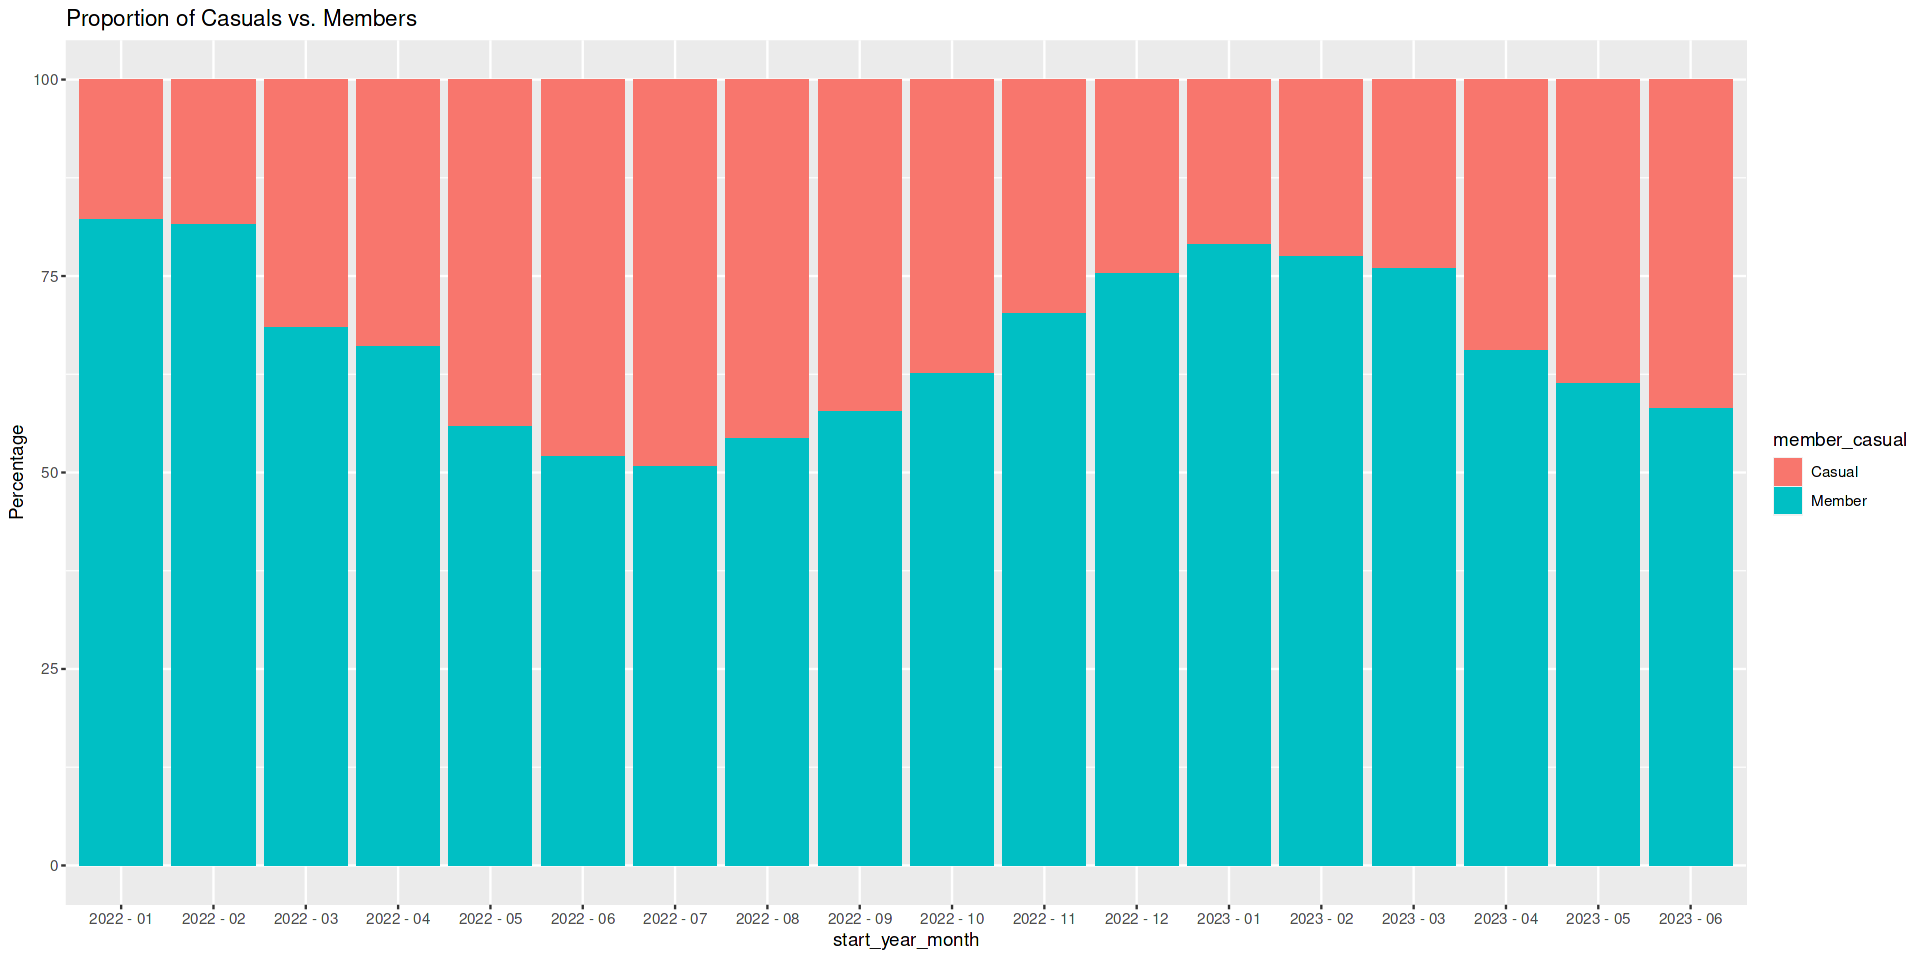

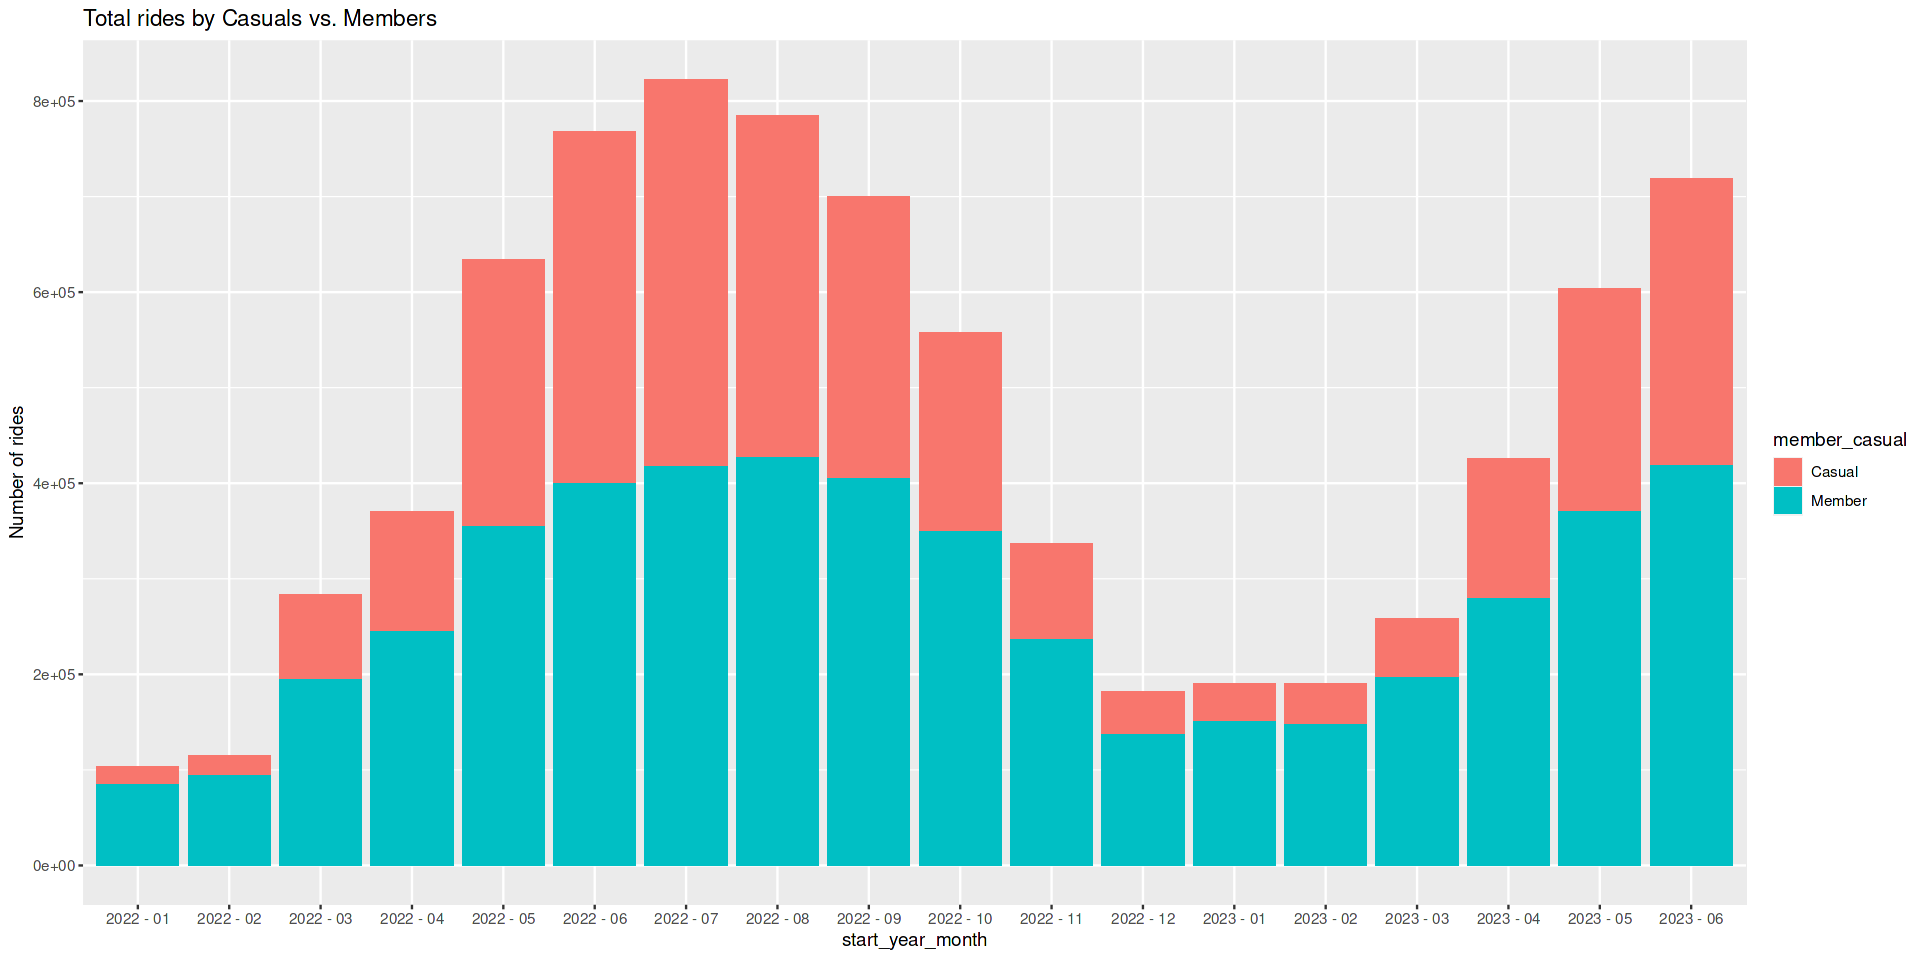

In [24]:
fig(16,8)
cyclistics %>%
    group_by(start_year_month, member_casual) %>%
    summarise(count = n()) %>%
    ungroup() %>%
    group_by(start_year_month) %>%
    mutate(total_ride = sum(count),
          Percentage = count / total_ride * 100) %>% 
    ggplot() +
           geom_col(mapping = aes(x = start_year_month, y = Percentage, fill = member_casual)) + 
           labs(title = "Proportion of Casuals vs. Members")

cyclistics %>%
    group_by(start_year_month, member_casual) %>%
    summarise(count = n()) %>%
    ungroup() %>%
    group_by(start_year_month) %>%
    mutate(total_ride = sum(count),
          Percentage = count / total_ride * 100) %>% 
    ggplot() +
           geom_col(mapping = aes(x = start_year_month, y = count, fill = member_casual)) +
           labs(title = "Total rides by Casuals vs. Members", y = "Number of rides")

From the available data, some trends can be spotted:

- There is a seasonal trend in the total of rides through out the year, where it is at its mimima during Dec, Jan, and Feb; then gradually going up and reached a maxima during June, July, and August; and then lower again.

- Similarly to the above trend, the proportion of total rides being by casual riders are at lowest around December, Jan, and Feb in a year (can be as low as approximately 1/5 of the total), and highest during June, July, and August (can be as high as 1/2 of the total).

- Overall, majority of the rides are by Member riders.

More historical data can help confirming these trends.

# Examine trends over days in a week


`summarise()` has grouped output by 'start_weekday'. You can override using the
`.groups` argument.


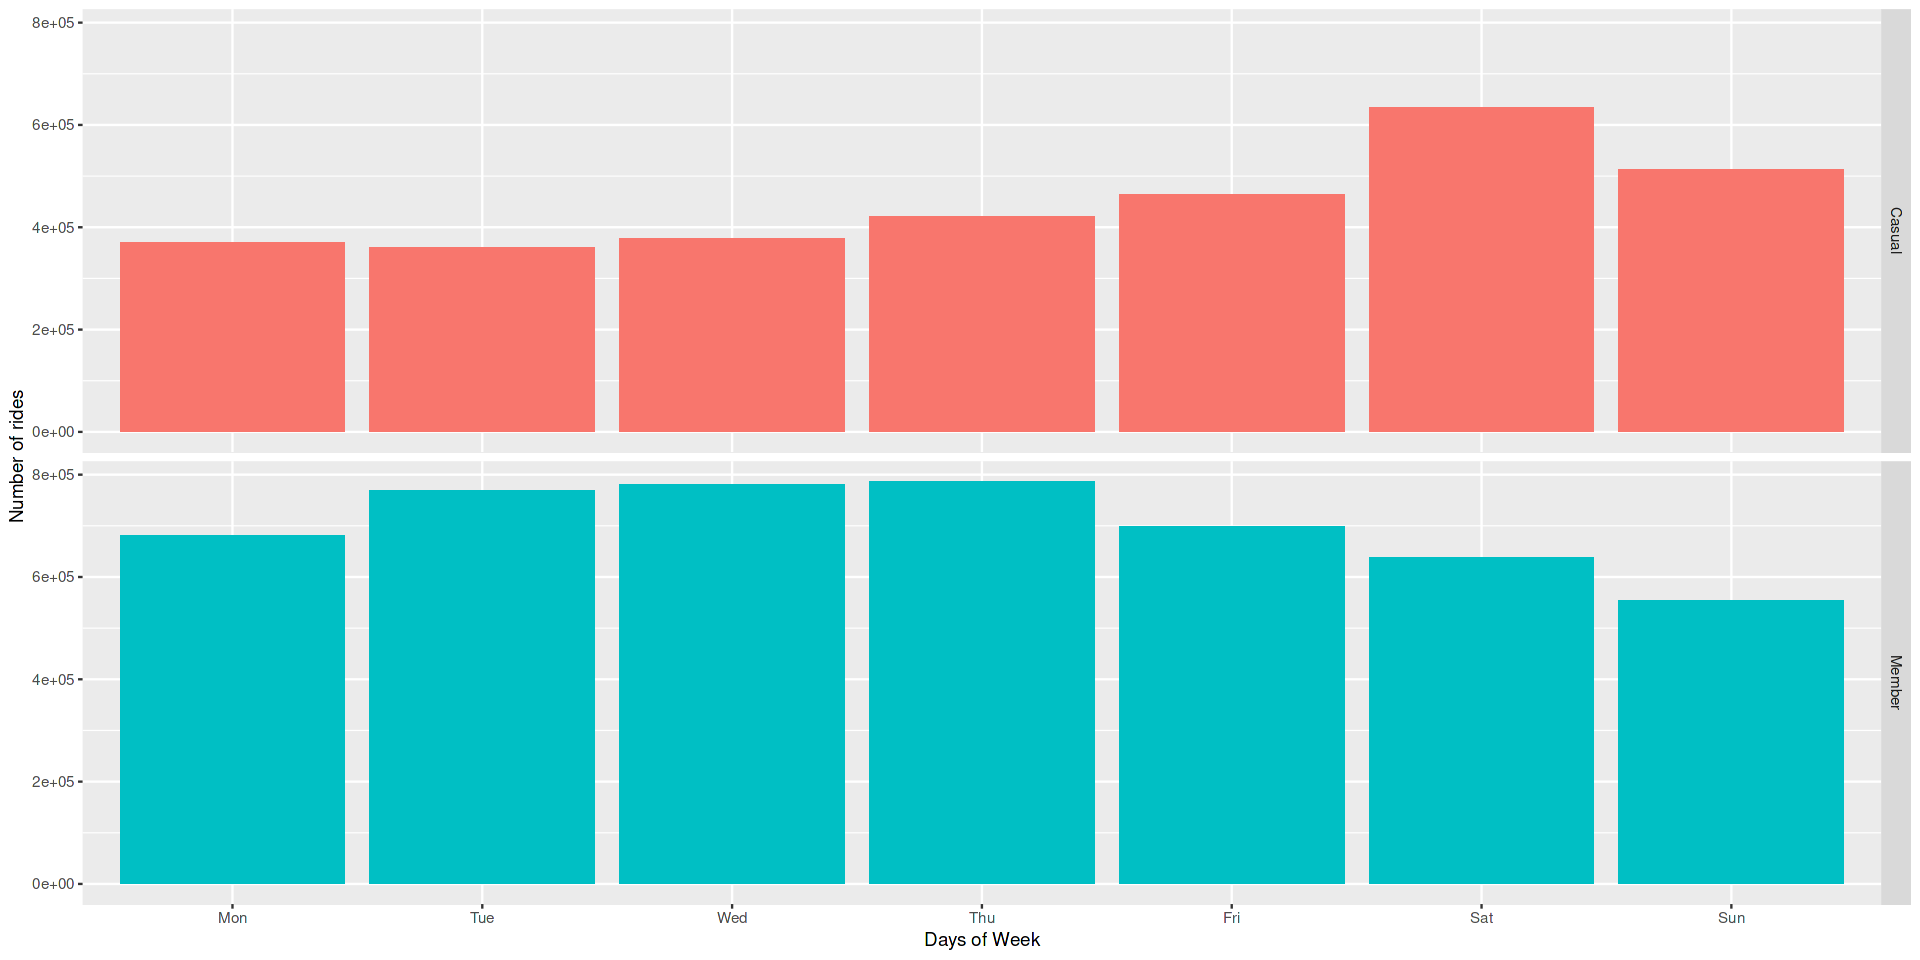

In [25]:
cyclistics %>% 
    group_by(start_weekday, member_casual) %>%
    summarise(count = n()) %>%
ggplot() +
    geom_col(mapping = aes(x = start_weekday, y = count, fill = member_casual)) +
    facet_grid(member_casual~.) +
    theme(legend.position = "None") +
    labs(y = "Number of rides", x = "Days of Week")

While we can see slight signs of trends in the above graphs:

- For Casual riders, the demand for rides went up on weekeds (especially Saturdays).

- For Member riders, the demand for rides was, contradictorily, higher during weekdays.

 The graphs were showing aggregation of these days of week through 1.5 years, so I wanted to further see if these trends were true across every month.

`summarise()` has grouped output by 'start_year_month', 'start_weekday'. You
can override using the `.groups` argument.


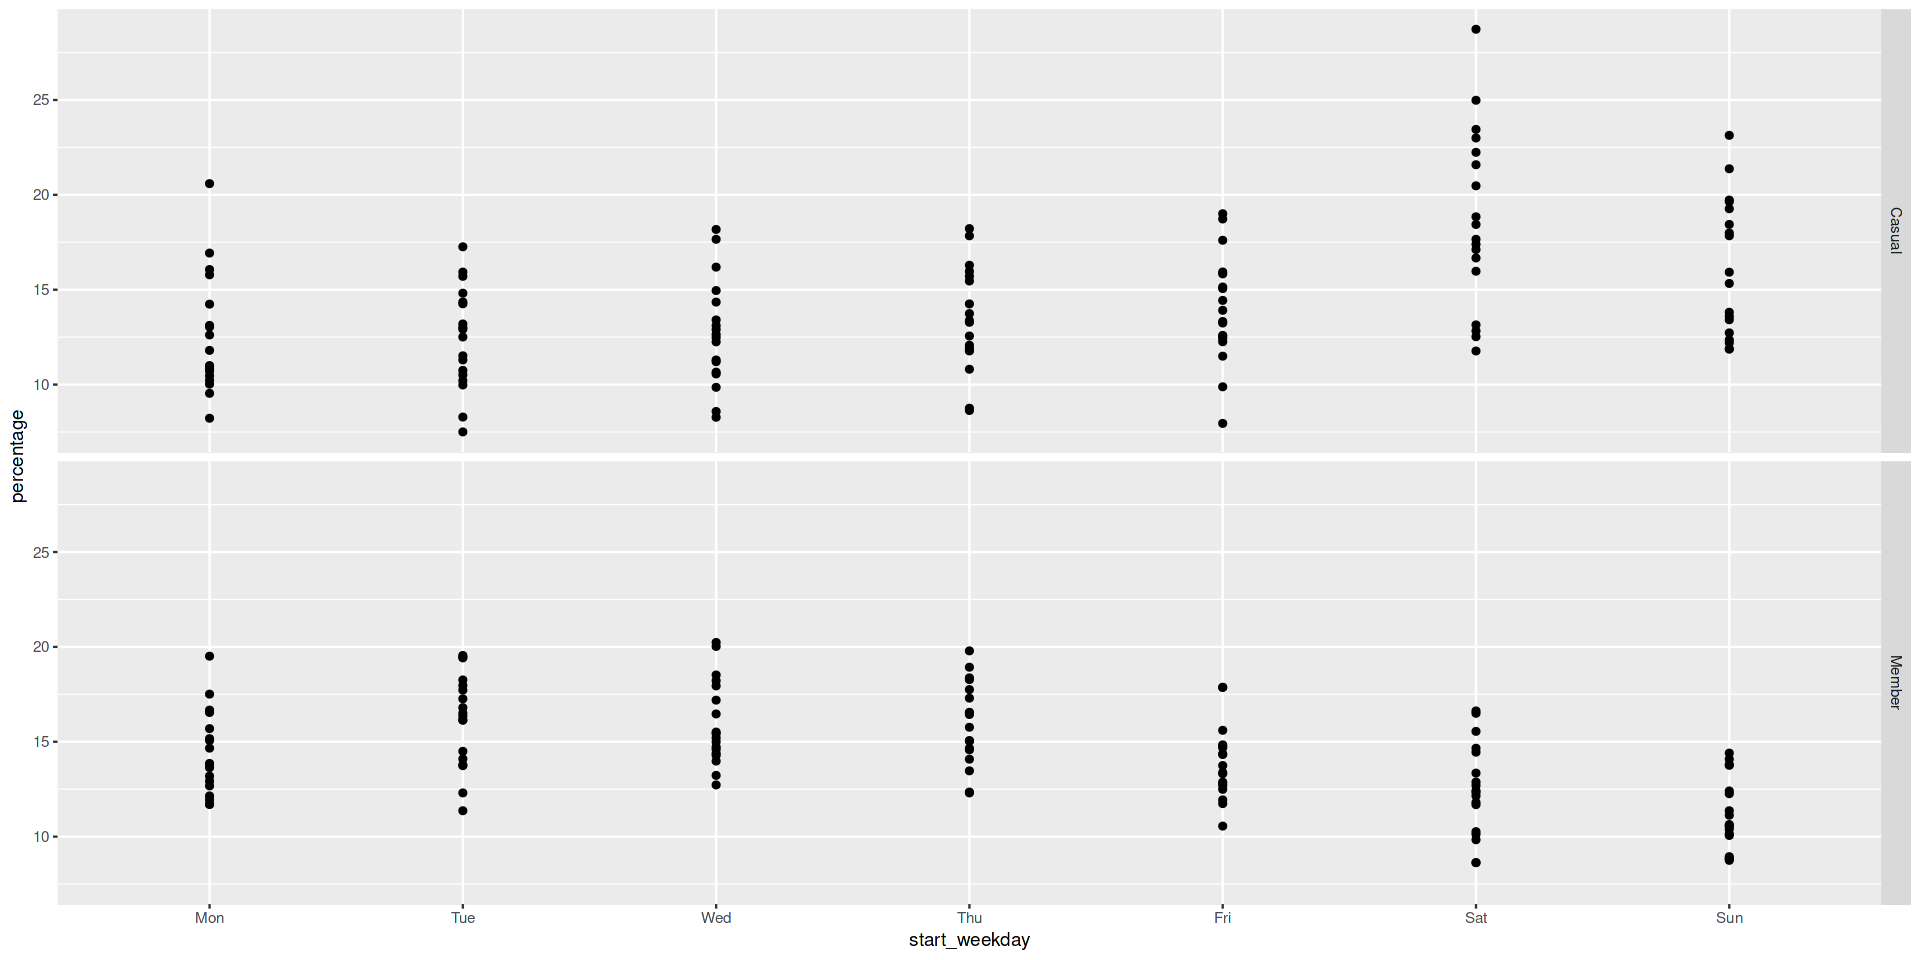

In [26]:
cyclistics %>% 
    group_by(start_year_month, start_weekday, member_casual) %>%
    summarise(count = n()) %>%
    ungroup() %>%
    group_by(start_year_month, member_casual) %>%
    mutate(total_for_month = sum(count),
          percentage = count / total_for_month * 100) %>%
ggplot() +
    geom_point(mapping = aes(x = start_weekday, y = percentage)) +
    facet_grid(member_casual ~ .)

The above graphs showed the proportion of total rides in each month accounted by each day in a week.

Although the data points are dispered, I think they aligned with the trends we saw earlier.

# Hour of a day

We examine trends according to hour of a day.

`summarise()` has grouped output by 'start_hour'. You can override using the
`.groups` argument.


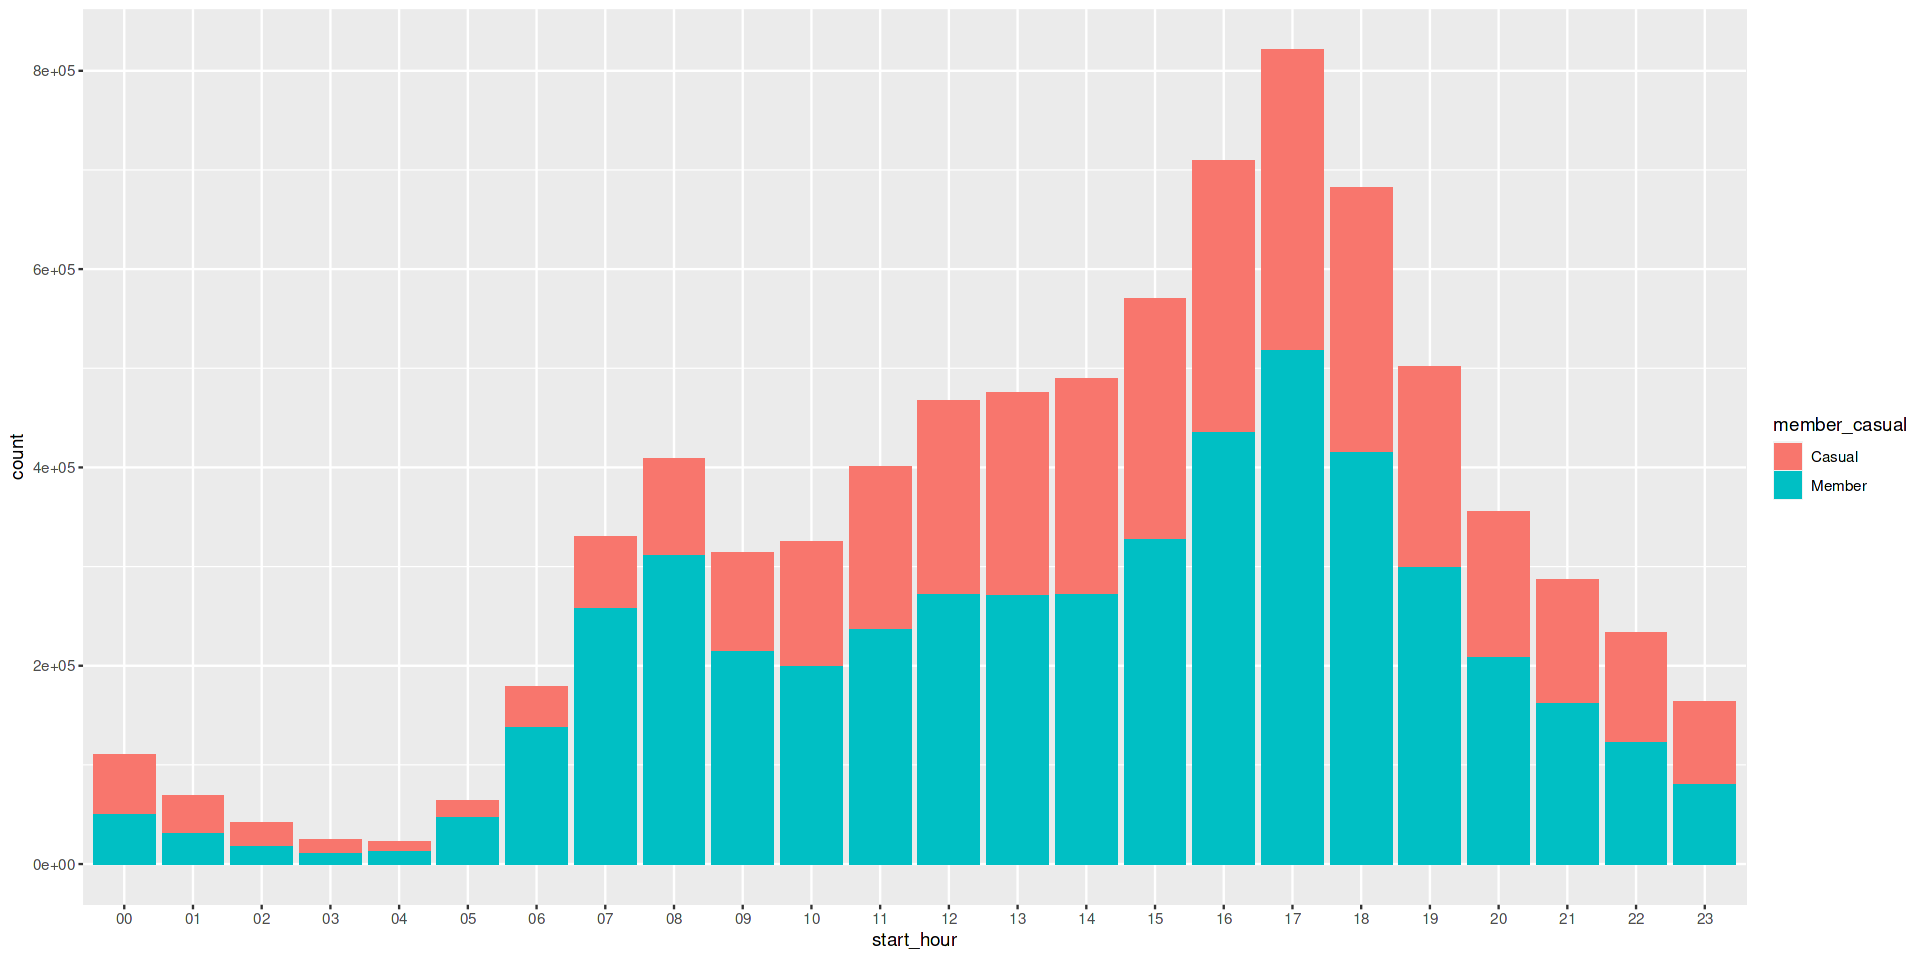

In [27]:
cyclistics %>%
    group_by(start_hour, member_casual) %>%
    summarise(count = n()) %>%
ggplot() +
    geom_col(mapping = aes(x = start_hour, y = count, fill = member_casual))

`summarise()` has grouped output by 'start_hour'. You can override using the
`.groups` argument.


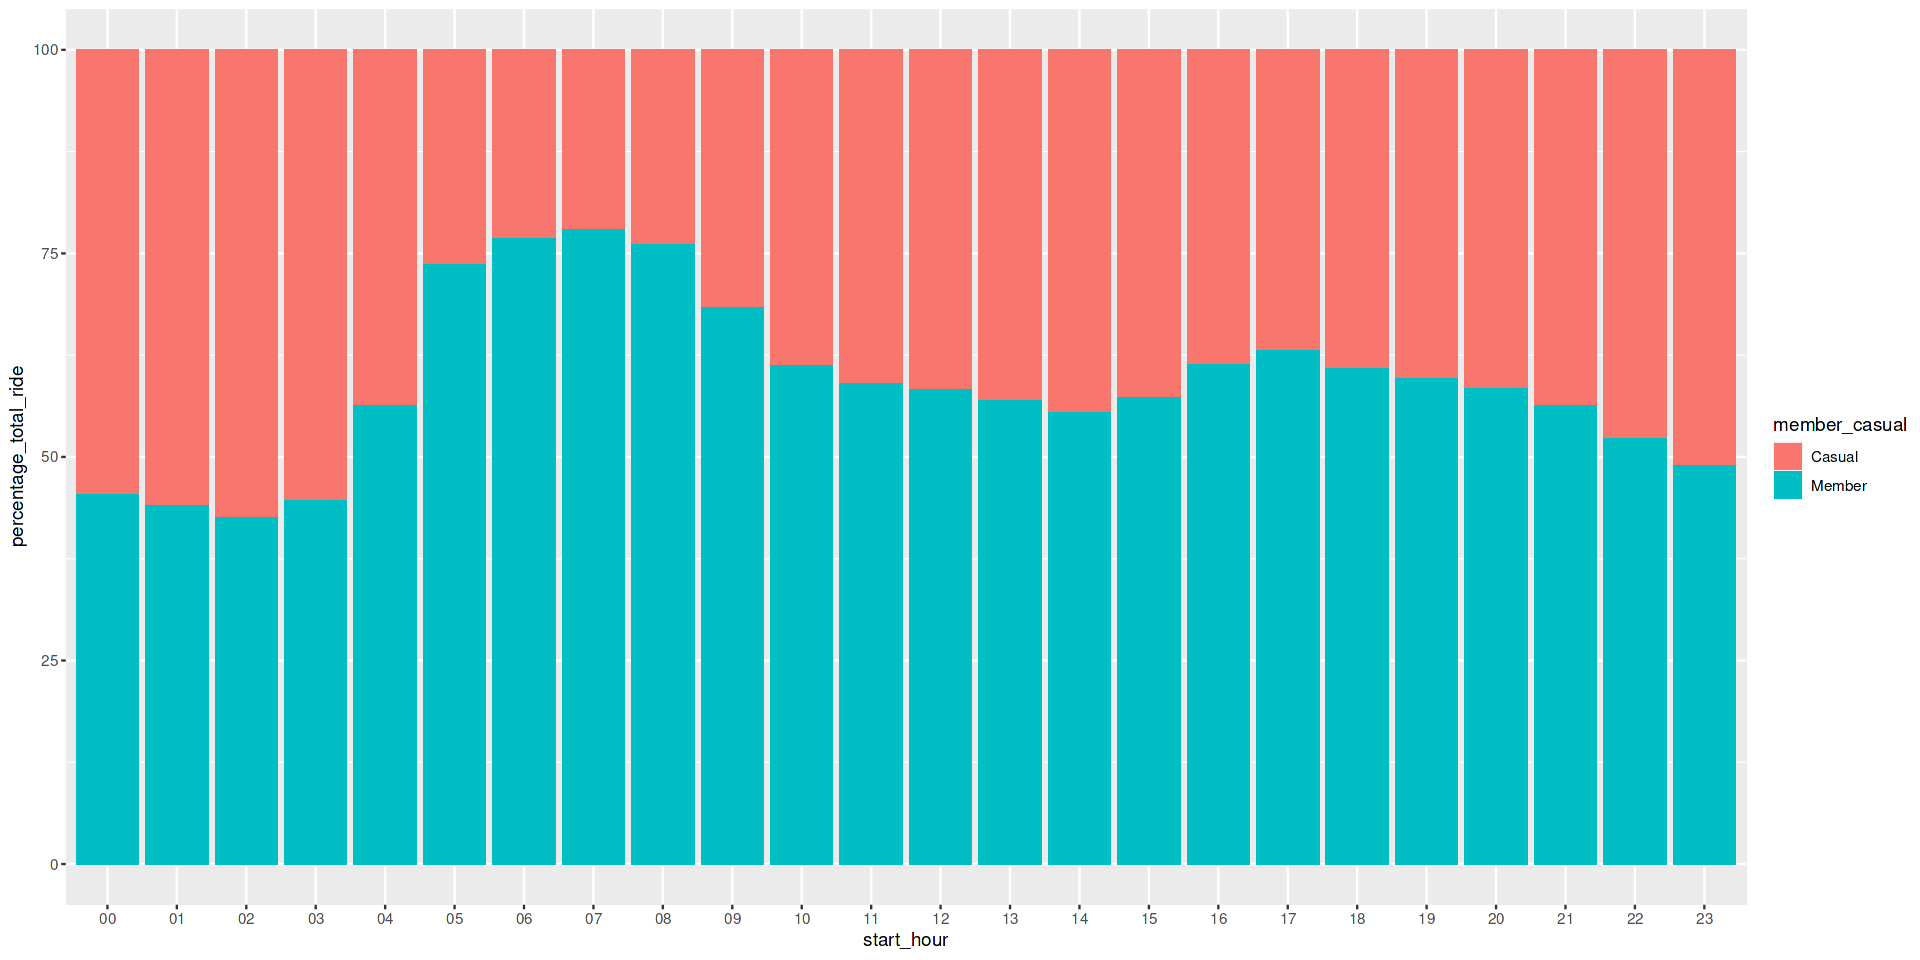

In [28]:
cyclistics %>%
    group_by(start_hour, member_casual) %>%
    summarise(count = n()) %>%
    ungroup() %>%
    group_by(start_hour) %>%
    mutate(total_ride = sum(count),
          percentage_total_ride = count / total_ride * 100) %>%
ggplot() +
    geom_col(mapping = aes(x = start_hour, y = percentage_total_ride, fill = member_casual))

From the above graphs, we can see that:

* Most of the rides occur during the daylight hours, from 7:00 to 19:00;

* With a peak during the afternoon around 16:00 to 18:00, and another local peak at around 7:00 and 8:00, these may link to the commuting to and from work of customers who work a 9 to 5 job.

* These two points in day (commuting to and from work) connects to another trend, in which during these times, there are more members than casuals. Out of these times, the ratio tend to balance, or even favour casual riders.

As learned from the analysis of trends over days of week and over hours of day, we see there is a difference between weekdays and weekends that can possibly be key in difference between how members and casuals use our services.

`summarise()` has grouped output by 'start_weekday', 'start_hour'. You can
override using the `.groups` argument.


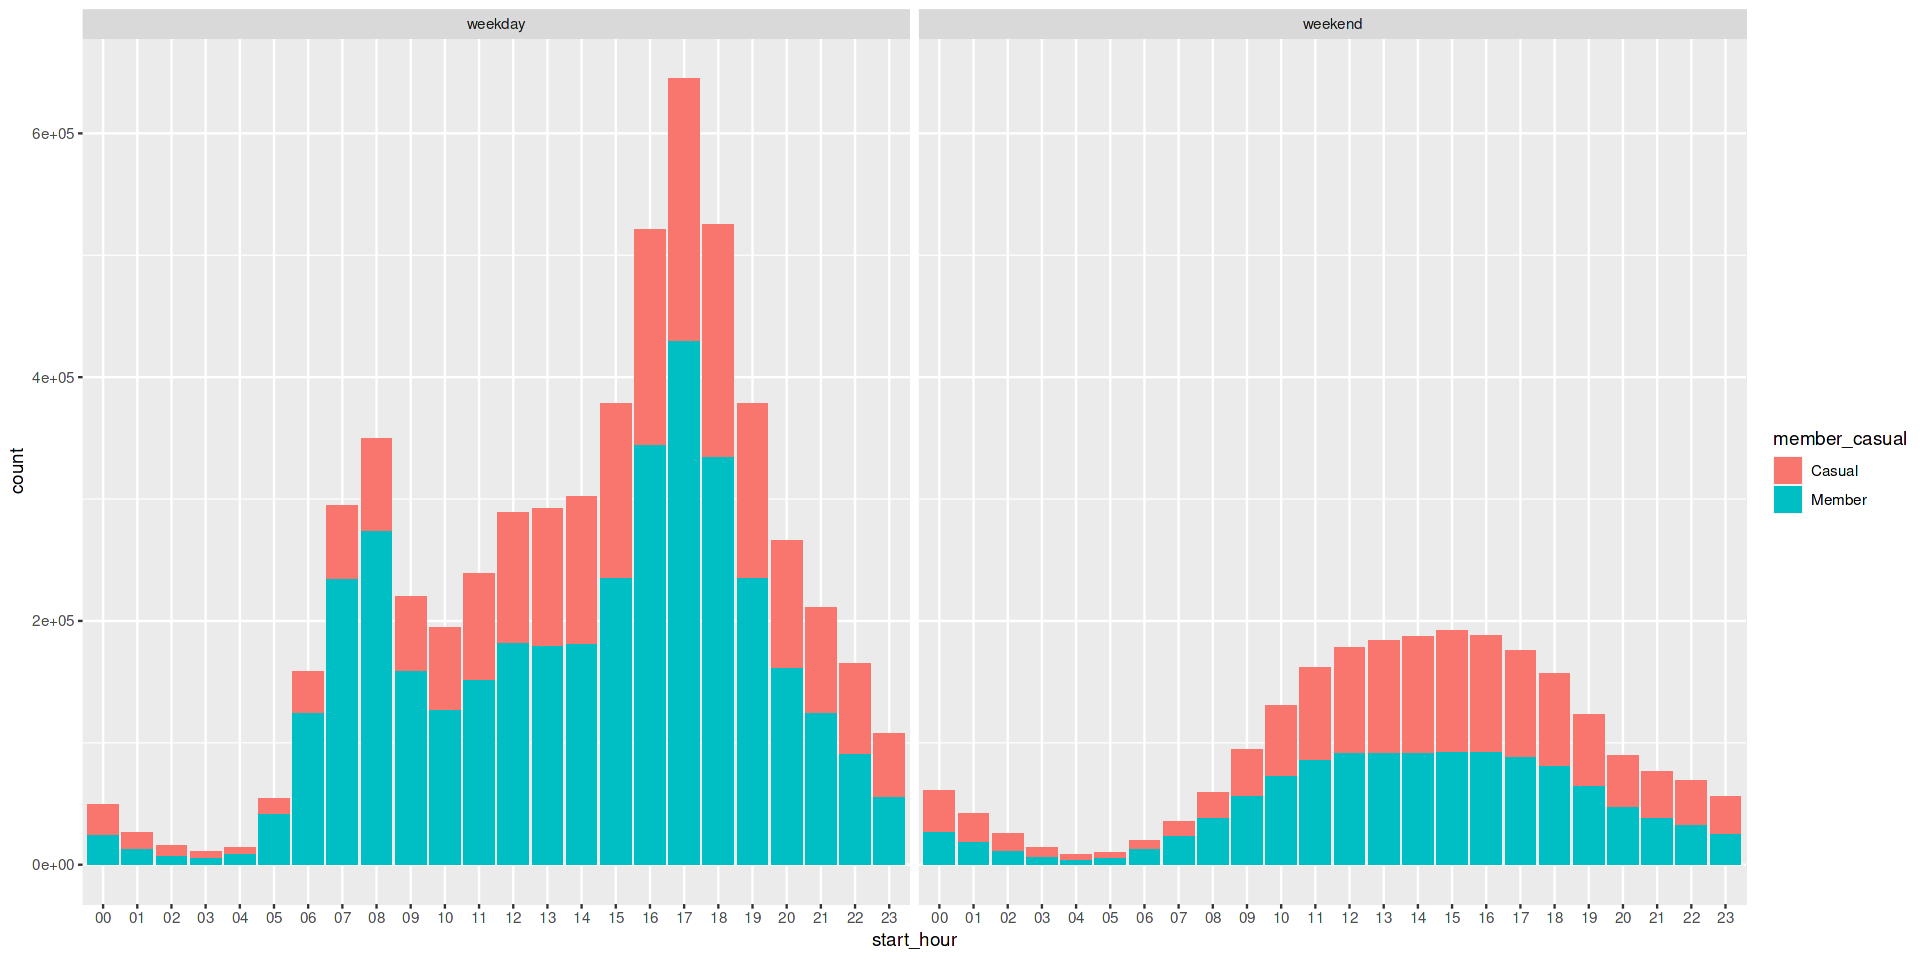

In [29]:
cyclistics %>%
    group_by(start_weekday, start_hour, member_casual) %>%
    summarise(count = n()) %>%
    mutate(type_of_day = ifelse(start_weekday == "Sat" | start_weekday == "Sun", "weekend", "weekday")) %>%
ggplot() +
    geom_col(mapping = aes(x = start_hour, y = count, fill = member_casual)) +
    facet_wrap(~ type_of_day)

Note that there are only 2 weekends in a week comparing to 5 weekdays in a week.
The total of rides difference between the two categories (weekday and weekend) as shown in the above graph is of little importance.

The above graph offers some interesting insights:

* The trends that state most of our rides occur during daylight with the highest around the after noon persists.

* During weekends, we have a smoother histogram distribution, we can reasonably argue that there is no significant different in member use and casual use during the weekends.

* The weekdays show a notable evidence of the trend that we identified earlier (about how our members are more in need of our rides during the commuting hours).

* Interestingly, our casual riders also increasingly need our rides during the hours too, especially between 16:00 and 18:00. This can be helpful on converting casual riders to members.

# rideable_type: 

type of bikes

In [30]:
cyclistics %>%
    group_by(rideable_type) %>%
    summarise(count = n(),
             percentage_of_total = count / nrow(cyclistics) * 100,
             casual_p = sum(member_casual == "Casual") / count * 100,
             member_p = sum(member_casual == "Member") / count * 100)

rideable_type,count,percentage_of_total,casual_p,member_p
<chr>,<int>,<dbl>,<dbl>,<dbl>
Classic_bike,3636877,45.183642,32.85225,67.14775
Docked_bike,217673,2.704314,100.00000,0.00000
Electric_bike,4194551,52.112043,41.24019,58.75981


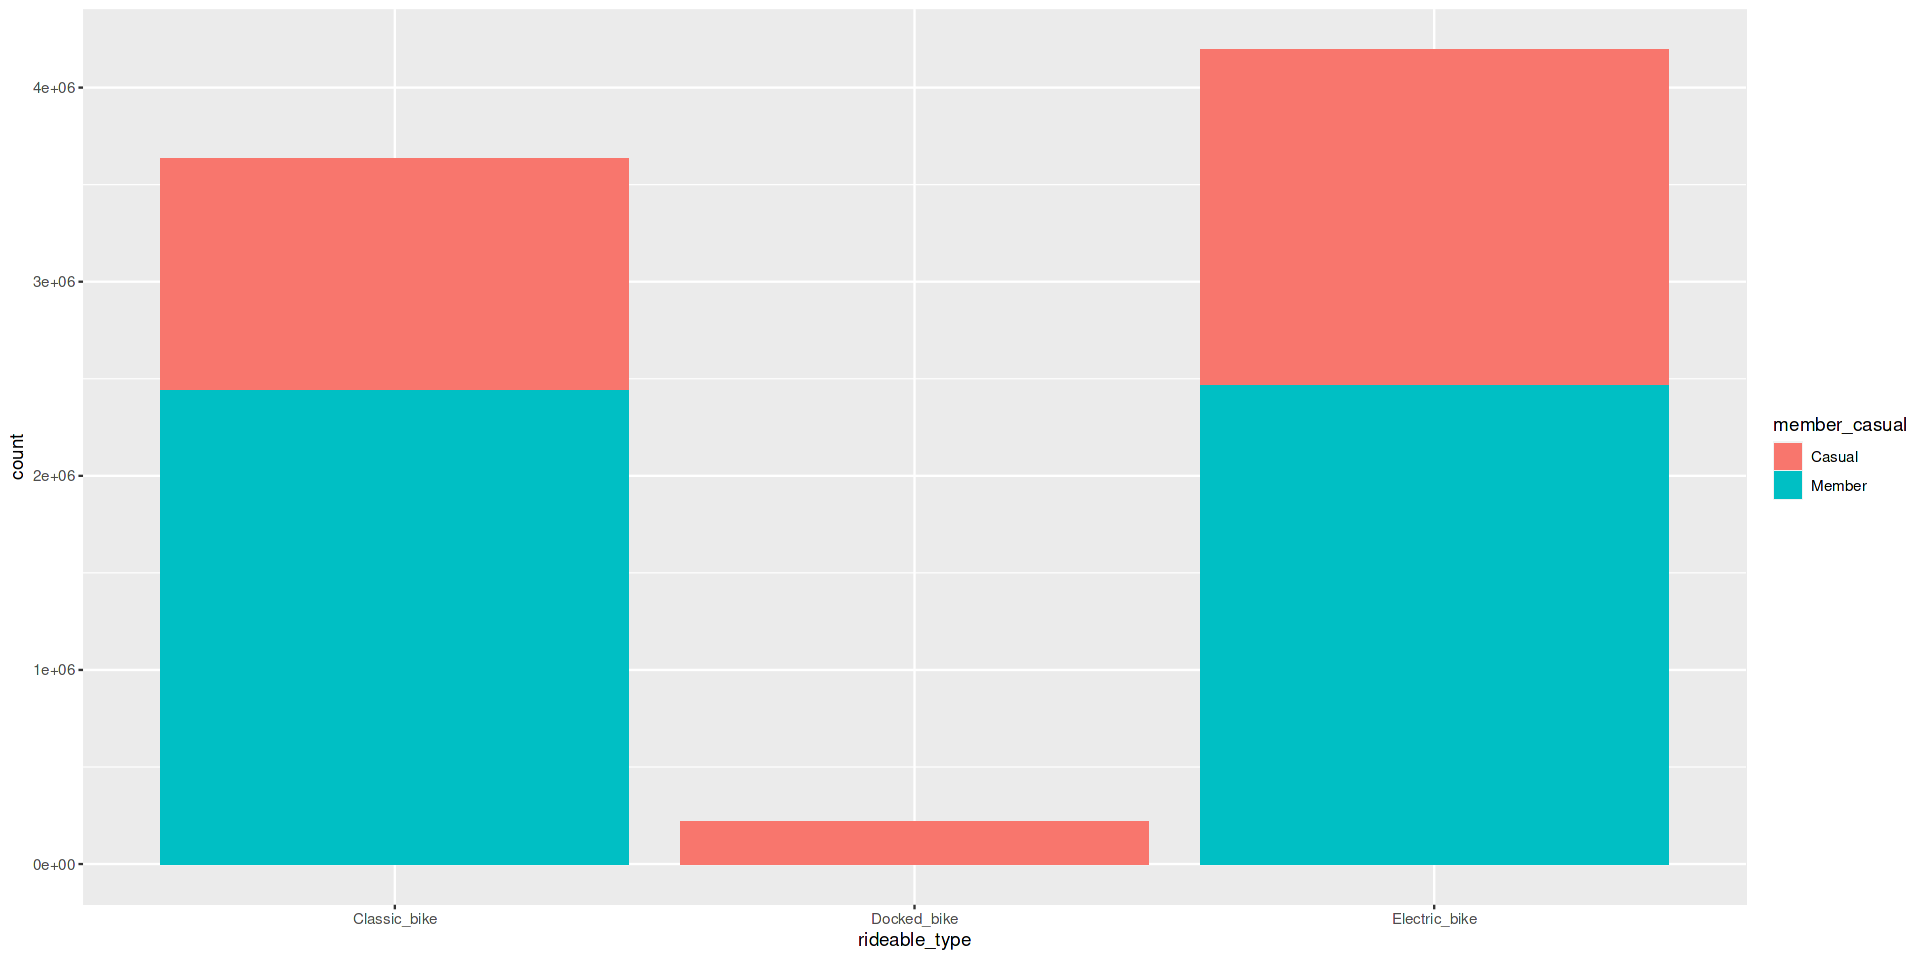

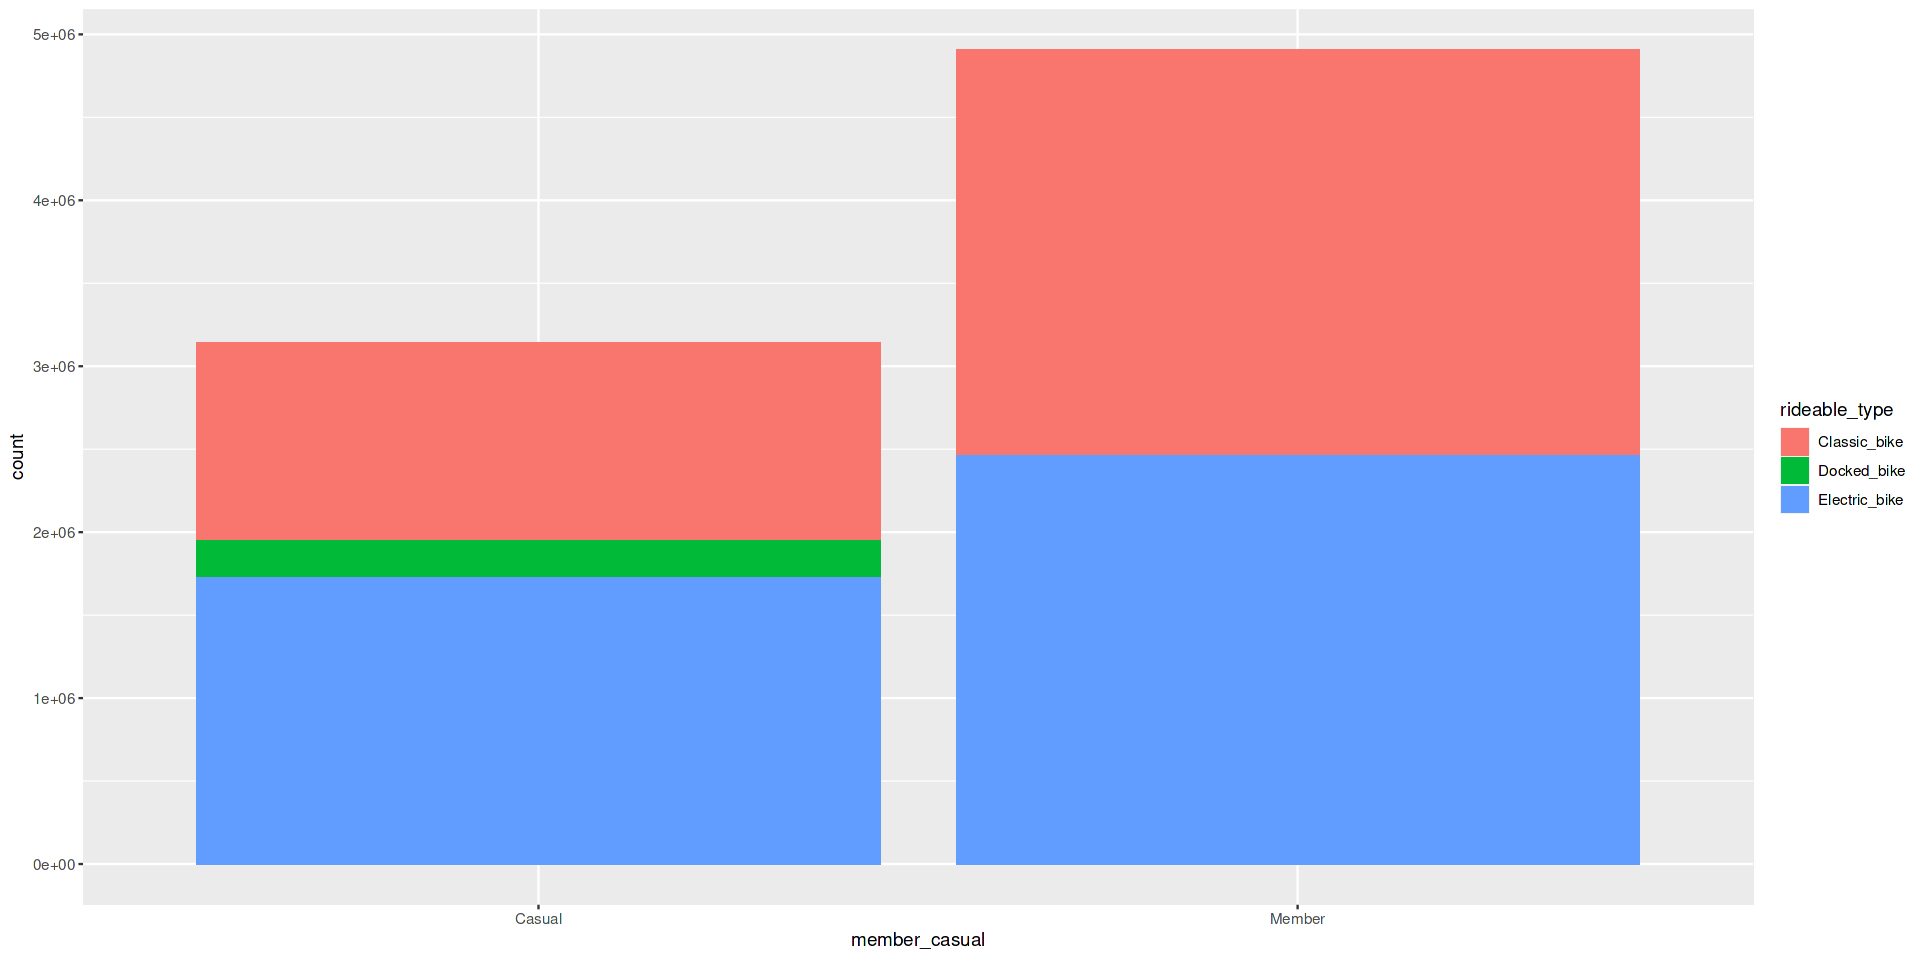

In [31]:
ggplot(data = cyclistics, mapping = aes(x = rideable_type, fill = member_casual)) + 
    geom_bar()
ggplot(data = cyclistics, mapping = aes(x = member_casual, fill = rideable_type)) + 
    geom_bar()

The result, presented by the graphs, is quite surprising:

* It appeared that Member riders tend to have no preference between Classic Bikes and Electric Bikes. And they actually don't use Docked Bikes, my hypothesis is that as the Members rider chose to use Cyclistics' service as their primary means of day-to-day commuting, they value the flexibility of dockless bikes. Being able to drop off the bike outside of your door means that there is a high chance that you will have a bike ready to be used right outside of your door tomorrow when you know you need to commute again.

* The Casual riders, surprisingly, are the only riders of Docked Bikes. This may be because that Casual riders don't have a premade plan for using Cyclistics' service, if a Docked Bike happened to be in their sight when they needed it, the riders would use the bike.

* The Casual riders also seemed to have a preference for Electric Bikes to Classic Bikes. This can be another profound difference between Members and Casual riders, indicating that the 2 groups have different process for choosing which type of bikes to ride.

* The choice between Electric Bikes and Classic Bikes can be interesting since it links with the exercise-using-bikes use of our service.

It is important to note that this information we see in our graph may be merely a result of chance, or because of accessibility to different types. And the proposed hypotheses are just hypotheses, a thorough and complete analysis with more data should be pursued to further investigate the choice of type of bikes by Cyclistics' customers.

# ride_time_minutes

In [32]:
summary(cyclistics$ride_time_minutes)
quantile(cyclistics$ride_time_minutes, c(0.05, 0.95))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.02     5.62     9.93    15.85    17.83 34354.07 

5%       95% 
 2.216667 43.500000

We see that the min of 0.02 minute, which is only 1.2 seconds is clearly an 
rror (entry or user). This lower-end is not needed in the analysis.

The upper-end is 34354.07 minutes, this is almost 1 month, and is too far away from the 3rd quartile of 17.83 minutes. Thus, this high amount is also an error.

I decided to use the data from 0.05 percentile to 0.95 percentile of ride_time_minutes.

In [33]:
cyclistics_without_ouliners <- cyclistics %>%
    filter(ride_time_minutes >= quantile(ride_time_minutes, 0.05), 
           ride_time_minutes <= quantile(ride_time_minutes, 0.95)
          )
print(paste(nrow(cyclistics_without_ouliners), "rows down from", nrow(cyclistics), "rows."))
print(paste(nrow(cyclistics) - nrow(cyclistics_without_ouliners), "were removed."))

[1] "7247212 rows down from 8049101 rows."
[1] "801889 were removed."


The number of rows removed was 10% of the total observations. We should be careful accepting this solution for outliners.

In [34]:
cyclistics_without_ouliners %>%
    group_by(member_casual) %>%
    summarise(mean = mean(ride_time_minutes),
             first_quarter = quantile(ride_time_minutes, 0.25), 
             median = quantile(ride_time_minutes, 0.5), 
             third_quarter = quantile(ride_time_minutes, 0.75), 
             interquartile_range = third_quarter - first_quarter)

member_casual,mean,first_quarter,median,third_quarter,interquartile_range
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Casual,14.44882,7.166667,11.800000,19.53333,12.366667
Member,11.47632,5.466667,8.966667,14.95000,9.483333


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


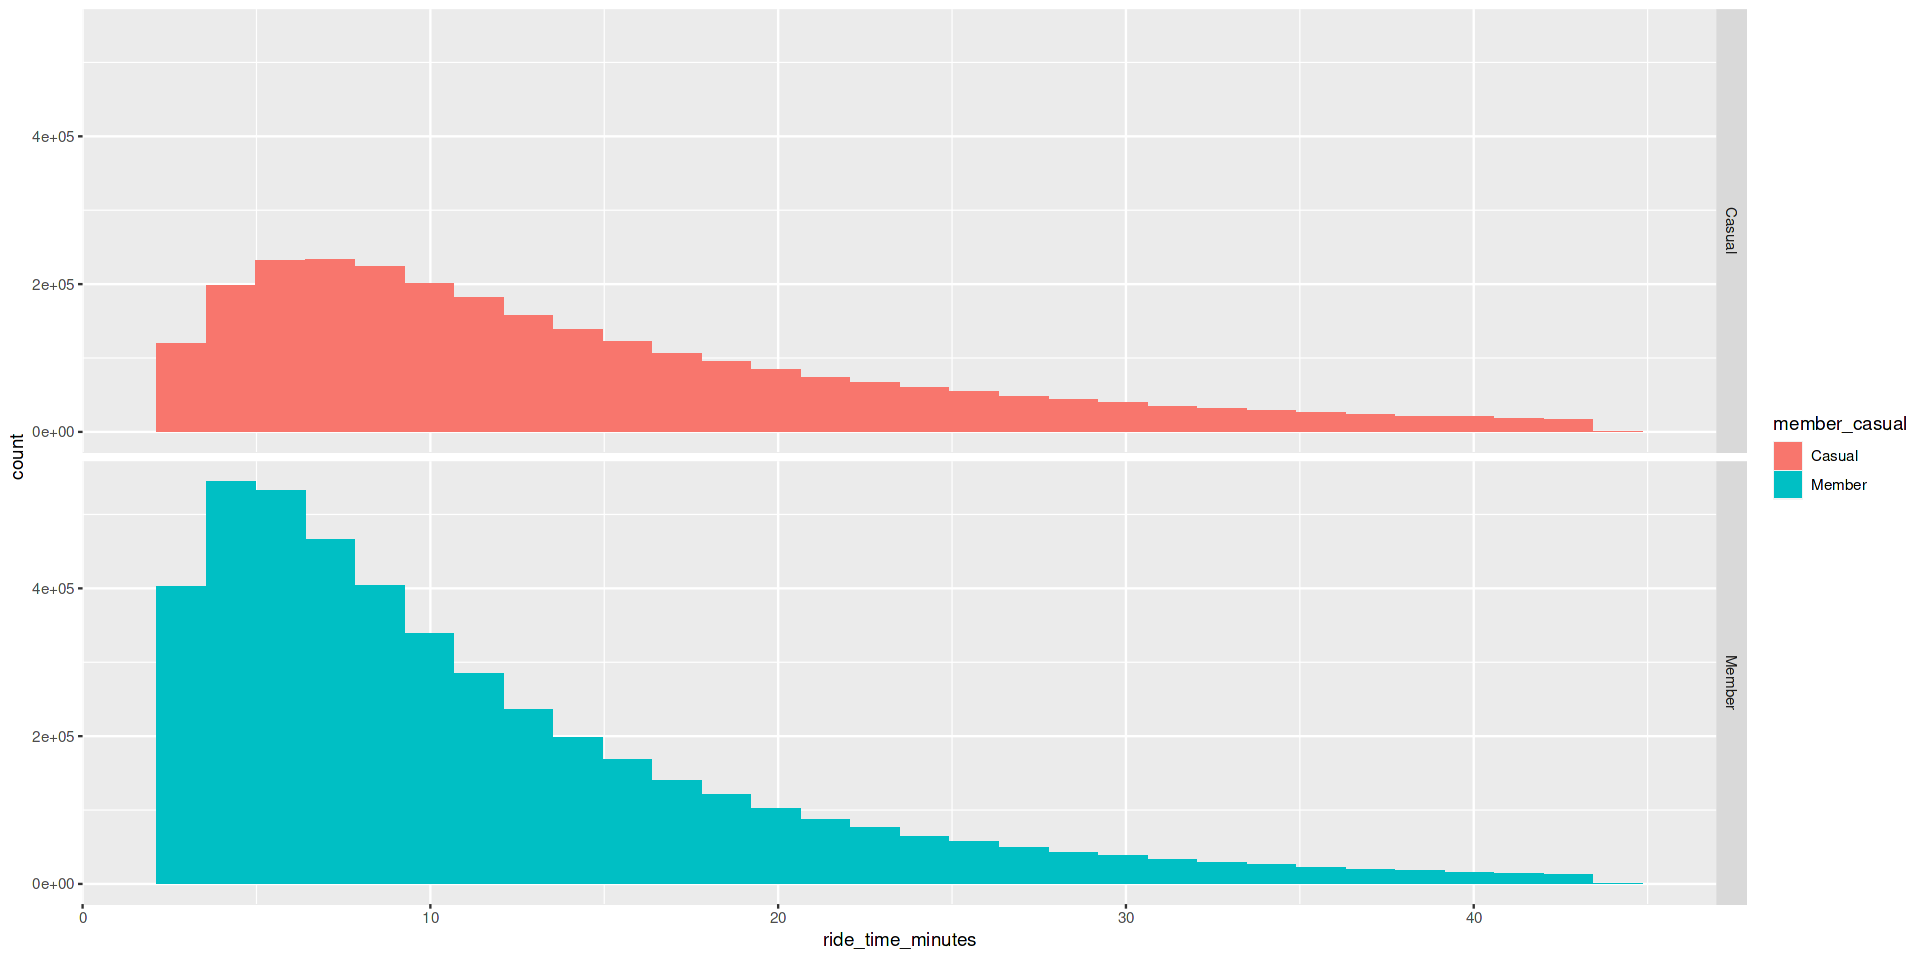

In [35]:
cyclistics_without_ouliners %>%
ggplot() +
    geom_histogram(mapping = aes(x = ride_time_minutes, fill = member_casual)) +
    facet_grid(member_casual~.)

From the above graphs and summary statistics, we observe differences in the behavior of members and casual riders when it comes to riding the bikes:

* In general, the length of rides is shorter for members' rides compared to that of the casual riders;

* On top of that, length of members' rides is less dispersed too, this aligns with our hypothesis that the members riders used Cyclistics' service for pre-scheduled rides.

We also examine the length of ride grouped by day of week and hour of day

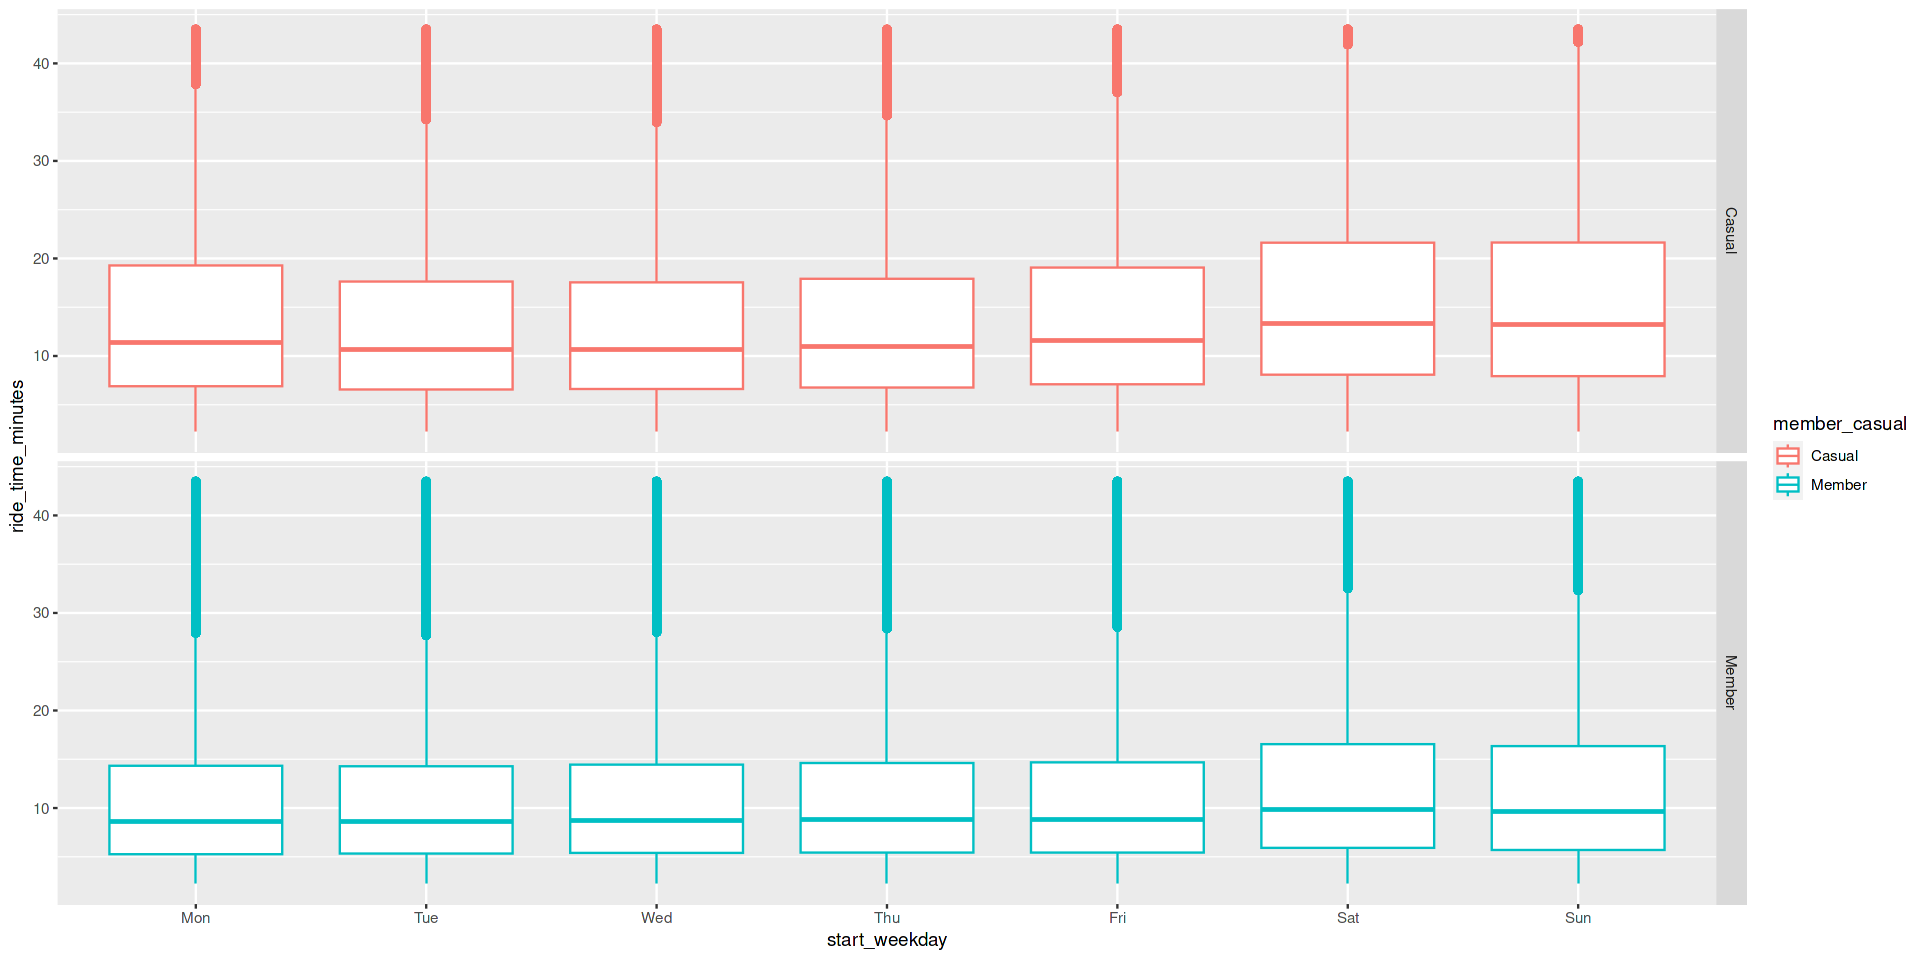

In [36]:
cyclistics_without_ouliners %>%
ggplot() +
    geom_boxplot(mapping = aes(x = start_weekday, y = ride_time_minutes, color = member_casual)) +
    facet_grid(member_casual~.)

We can see that there is a going up in the length of rides in weekends compared to other weekdays.
This trend is not significantly observed for Members (there is still some). But it is quite noticeable for Casual riders; this goes hand-in-hand with the obervation that the number of rides also goes up during weekends for Casual members. This support the findings that there are more demand for Cyclistics' service from Casual riders on weekends.

A hypothesis is that during the weekends, more people are using Cyclistics' service for exercises and going around having fun on their weekend off from work.

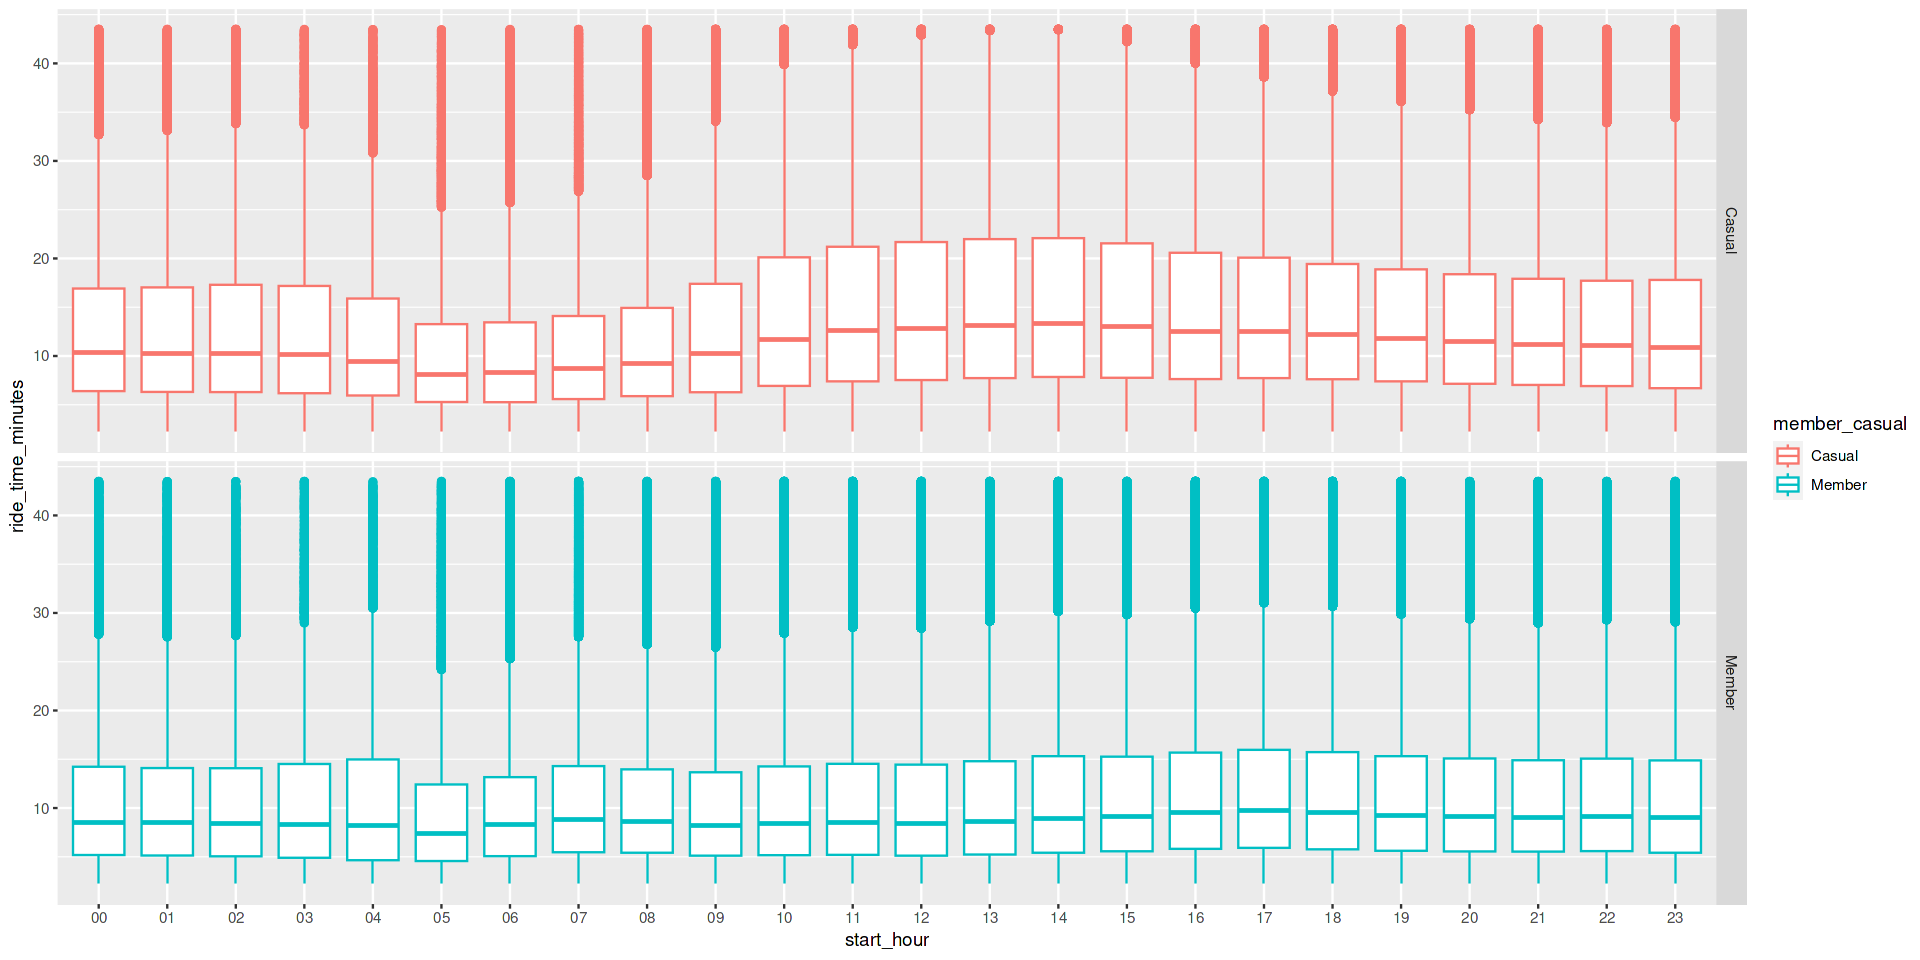

In [37]:
cyclistics_without_ouliners %>%
ggplot() +
    geom_boxplot(mapping = aes(x = start_hour, y = ride_time_minutes, color = member_casual)) +
    facet_grid(member_casual~.)

From the above graphs, we can see that:

* The length of rides is relatively constant for Member riders throughout the day, there is increase during the after noon, this aligns with our findings about the increased demand during the afternoon.

* For casual riders, this peak is, instead in the after noon, around the mid of the day. A hypothesis for this is that during these hottest time of the day, people will opt to bikeriding to avoid walking in the heat.

### Guiding questions:

* **How should you organize your data to perform analysis on it?:**
The data were combined into a single data table, serving the aggregation of the data.

* **Has your data been properly formatted?:**
All the variables were checked for data validation, and they were in the correct, useful data type.

* **What surprises did you discover in the data?:**

One surprise to me that there are significantly more demand for bike riding during the after noon, the hypothesis for this is that peopel are riding bikes to avoid having to walk for longer under the burning sun.

Also, there are some possibly interesting insights regarding the choice of bikes by customers, another analysis can be conducted to learn more about this topic.

* **What trends or relationships did you find in the data?:**
The main discover was that the biggest difference between the member and casual riders was on weekdays, around 9:00 and 17:00. A hypothesis is that our members ride our bikes to commute to and from workplace, since they have a frequent and scheduled need of use for our service, they are willing to purchase a membership. 

* **How will these insights help answer your business questions?:**
Using the found insights, the marketing team can better understand the customer demand that we are serving, this can be the key selling feature of our service. The marketing team can then determine how this feature aligns with the need of different group of customers and fine-tune the marketing campaign accordingly.

### Key tasks:

* **Aggregate your data so it's useful and accessible:** Done

* **Organize and format your data:** Done

* **Perform calculations:** Done

* **Identify trends and relationships:** Done

### Deliverable:

* **A summary of your analysis:** Done


# Share

Usually, this step should be accomplished with a slide show or a presentation of the findings of the analysis to the stakeholders. But for this project, the Kaggle notebook is already a presenting of the data analysis process and its findings.

The main insights that we discovered are:

* 60% of our current rides are made by Members, 40% by Casual riders.

* There is a seasonal trend in the demand for our rides, peaking around June, July, and August (the sunnier months). These are the warmer months in a year. 

* Additionally, we saw that there is a high increase for Cyclistics' service in the afternoon, during the hotter hours of a day. 

We can reasonably conclude that customers use our service when the weather is warmer and people want to go outside, and also when it is hotter that people want to ride a bike instead of walking in the heat.

* The key difference in how the Members and the Casuals are using Cylicistics' service is that the Members are using our services for commuting back and from work, the demand of this use peaks around 9:00 and 17:00 o'clock during the day. 

* And this difference is only present during weekdays. The use by Members and Casuals are relatively the same during weekends.

* And also Members have shorter and more consistent length of rides.

The Members that subscribed to Cyclistics' annual membership are people that have a scheduled plan (time, place, steps, etc.) of using our services especially for commuting to and from work

* We saw a higher demand for Cyclistics' service during the weekends, especially by Casual riders.

* During the weekends, the trend of rides made by Members and Casual riders are practically the same. And they follow the general higher-leveled trends such as higher demand during the after noon, higher demand during the warmer months.

* Noticeably, Casual riders have longer and more dispersed length of rides during the afternoon in a day.

* For both Members and Casual riders, length of rides are longer and more dispered on the weekends of a week.

That means, Casual riders, and Members who are utilizing the subscription they have already purchased, are using our services outdoor exercises and having-fun-outside weekends. This also explain the longer and more dispersed length of rides, these exercising and having-fun rides are less planned and more about enjoying the ride.

### Guiding questions:

* **Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?:**

* **What story does your data tell?:**

* **How do your findings relate yo tour original question?:**

* **Who is your audience? What is the best way to communicate with them?:**

* **Can data visualization help you share your findings?:**

* **Is your presentation accessible to your audience?:**

### Key tasks:

* **Determine the best way to share your findings:**

* **Create effective data visualizations:**

* **Present your findings:**

* **Ensure your work is accessible:**

### Delieverable:

* **Supporting visualizations and key findings:**

# Act

In this part, the marketing team will plan their marketing actions based on the findings of the data analysis.

My recommendations for the marketing team is:

* Increase marketing budget during the warmer months of the year and decrease marketing budget during the colder months of the year.

* Promote our service as a service for exercising and having fun riding bikes.

* Offer subscription that fits the increased demand during the weekends.


### Guiding questions:

* **What is your final conclusion based on your analysis?:**

* **How could your team and business apply your insights?:**

* **What next steps would you or your stakeholders take based on your findings?:**

* **Is there additional data you could use to expand on your findings?:**

### Key tasks:

* **Create your portfolio:**

* **Add your case study:**

* **practice presenting your case study to a friend or family member:**

### Deliverable:

* **Your top three recommendations based on your analysis:**
